# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['user_id'].nunique()

100

### Univariate Analysis

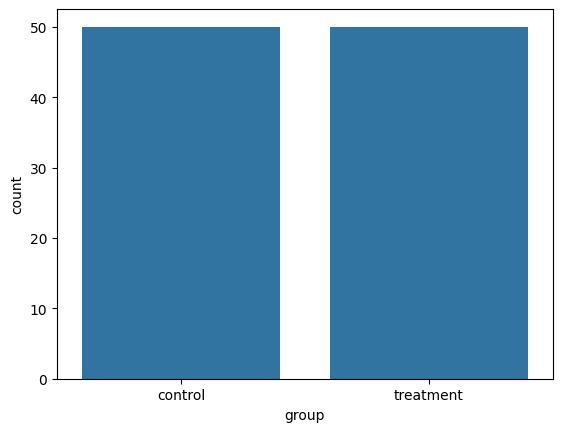

In [ ]:
sns.countplot(data=df, x='group')
plt.show()

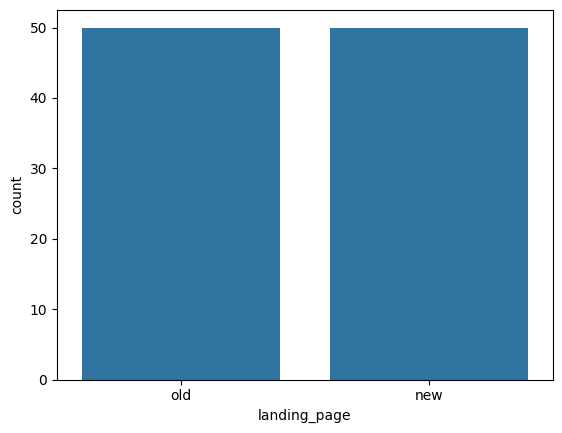

In [ ]:
sns.countplot(data=df, x='landing_page')
plt.show()

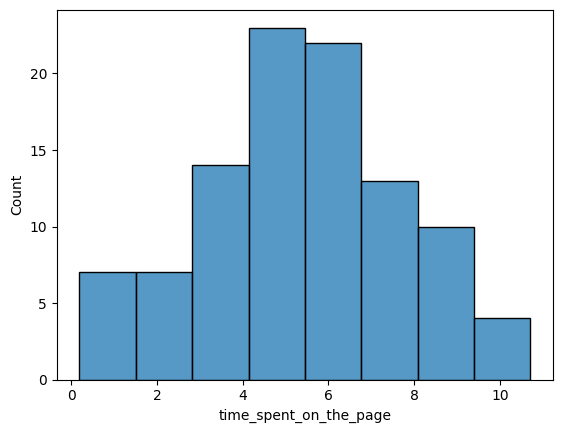

In [ ]:
sns.histplot(data=df, x='time_spent_on_the_page')
plt.show()

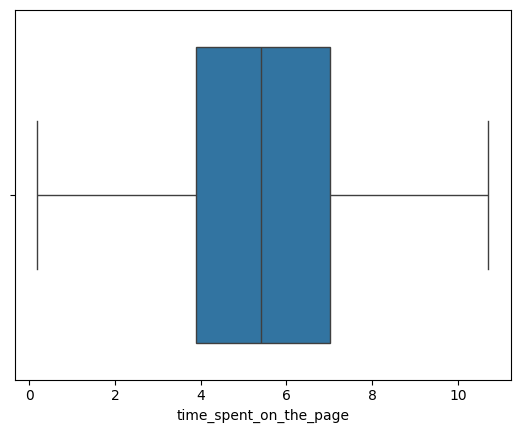

In [ ]:
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()

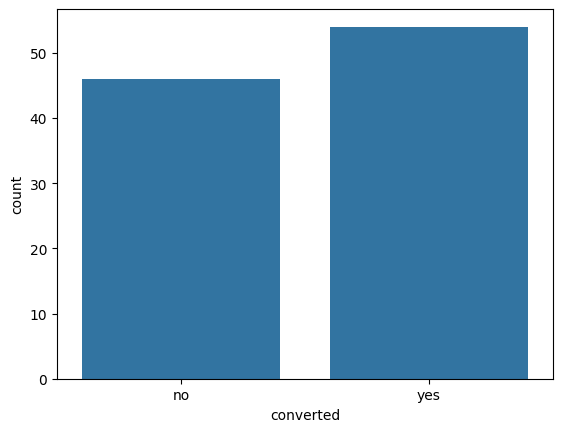

In [ ]:
sns.countplot(data=df, x='converted')
plt.show()

In [ ]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


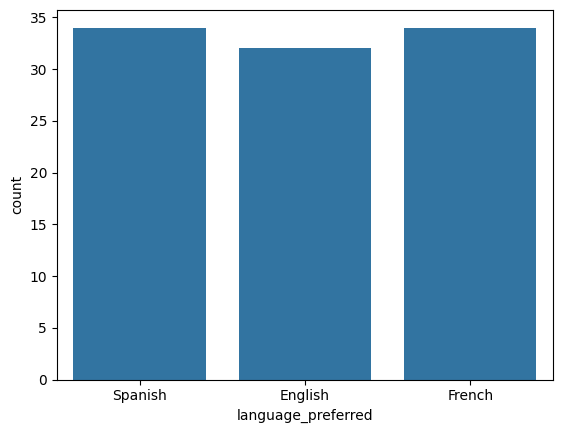

In [ ]:
sns.countplot(data=df, x='language_preferred')
plt.show()

In [ ]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


### Bivariate Analysis

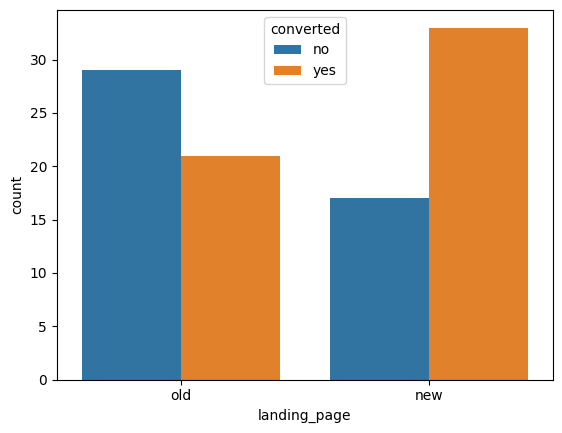

In [ ]:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.show()

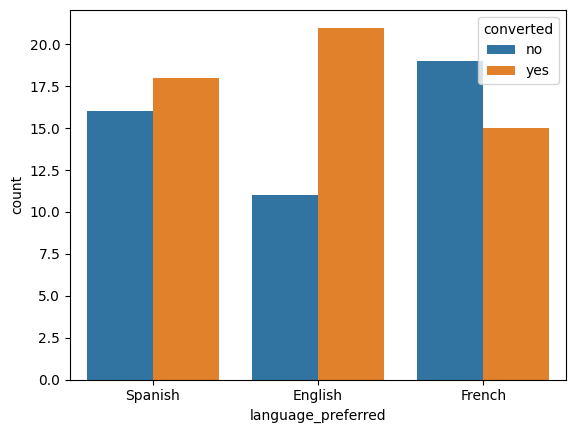

In [ ]:
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

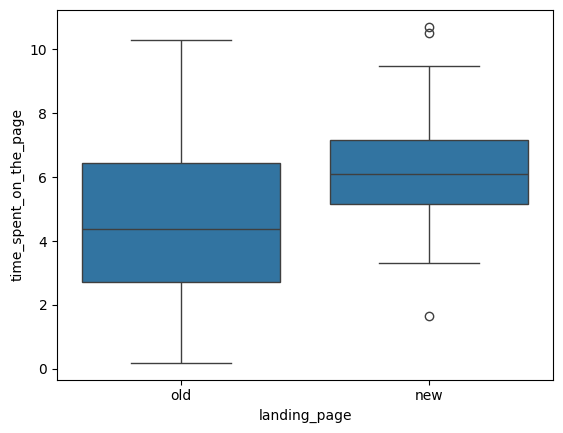

In [ ]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

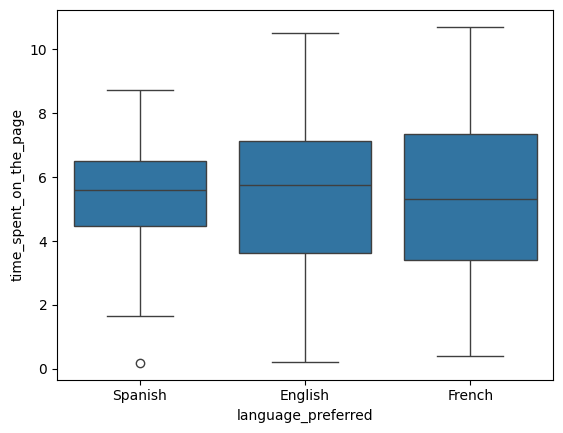

In [ ]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

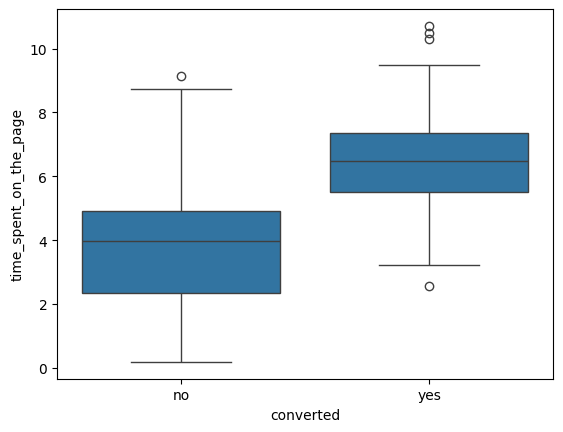

In [ ]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show()

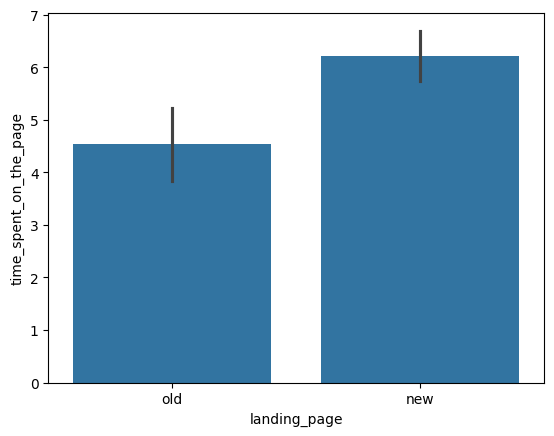

In [ ]:
sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

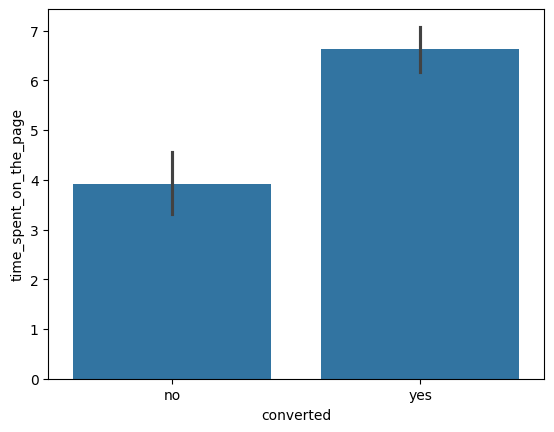

In [ ]:
sns.barplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show()

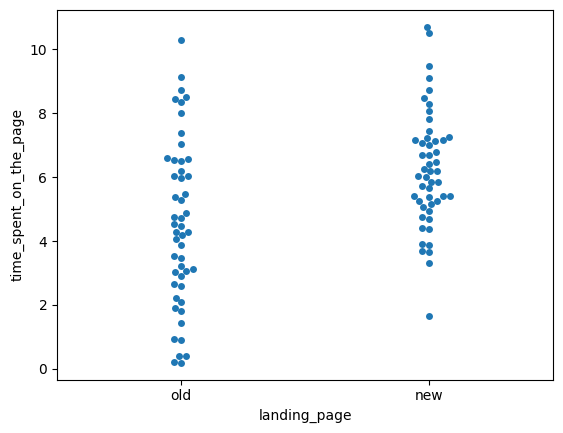

In [ ]:
sns.swarmplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

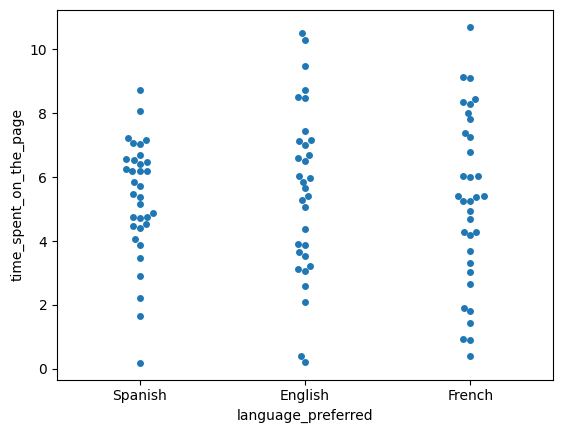

In [ ]:
sns.swarmplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

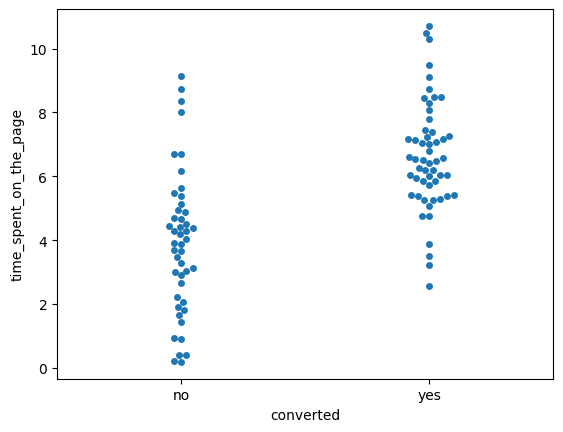

In [ ]:
sns.swarmplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

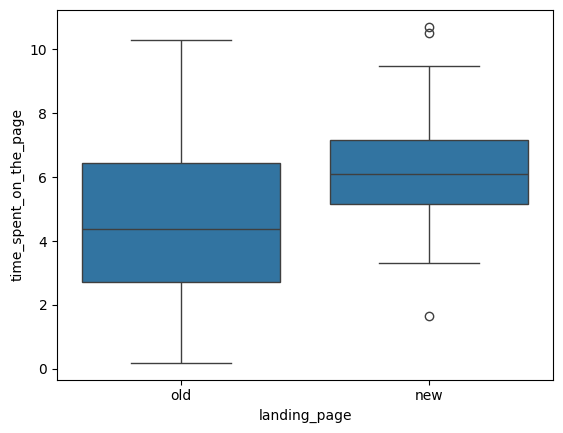

In [ ]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$ be the mean time spent on the new landing page while $\mu_2$ is the mean time spend on the existing landing page.


$H_0:\mu_1 \leq\mu_2$

$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

An indepented two-sample t-test will be conducted

### Step 3: Decide the significance level

The significant level will be $a = .05 $

### Step 4: Collect and prepare data

In [ ]:
time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
print('The mean amount of time spent on the new landing page is', round(time_new.mean(),2), 'minutes.')
print('The mean amount of time spend on the old landing page is', round(time_old.mean(),2), 'minutes.')
print('The sample standard deviation of the time spent on the new landing page is', round(time_new.std(),2))
print('The sample standard deviation of the time spent on the old landing page is', round(time_old.std(),2))

The mean amount of time spent on the new landing page is 6.22 minutes.
The mean amount of time spend on the old landing page is 4.53 minutes.
The sample standard deviation of the time spent on the new landing page is 1.82
The sample standard deviation of the time spent on the old landing page is 2.58


### Step 5: Calculate the p-value

In [ ]:
t, p = stats.ttest_ind(time_new, time_old, equal_var=False, alternative='greater')
print('The p-value is', p)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Reject the null hypothesis


### Step 7:  Draw inference

As the p-value is less than the significance level of 0.05, we can reject the null hypothesis. Therefore, there is enough statistical evidence to conclude that users spend more time on the new landing page in comparison to the existing landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

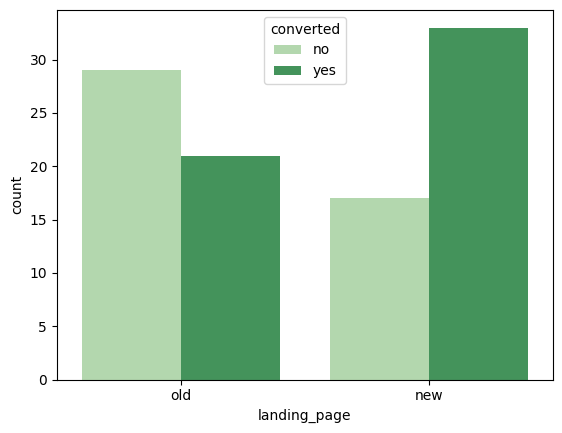

In [ ]:
sns.countplot(data=df, x='landing_page', hue='converted', palette='Greens')
plt.show()

Let $p_1$ be the conversion rate on the new landing page while $p_2$ is the converstion rate on the existing landing page.


$H_0:p_1 \leq p_2$

$H_a:p_1 > p_2 $

A two proportion Z-test will be conducted

The significant level will be $a = .05 $

In [ ]:
new_conv = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
old_conv = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']

landing_page_new = df[df['landing_page'] == 'new']['converted'].count()
landing_page_old = df[df['landing_page'] == 'old']['converted'].count()

print('The total number of users who used the new landing page is', landing_page_new)
print('The total number of users who used the old landing page is', landing_page_old)
print('\nThe number of users who converted on the new landing page is', new_conv)
print('The number of users who converted on the old landing page is', old_conv)

The total number of users who used the new landing page is 50
The total number of users who used the old landing page is 50

The number of users who converted on the new landing page is 33
The number of users who converted on the old landing page is 21


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

t, p = proportions_ztest([new_conv, old_conv], [landing_page_new, landing_page_old], alternative='larger')
print('The p-value is', p)

The p-value is 0.008026308204056278


In [ ]:
if p < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Reject the null hypothesis


As the p-value is less than the significance level of 0.05, we can reject the null hypothesis. Therefore, there is enough statistical evidence to conclude that when users visited the new landing page, they converted to a subscriber more frequently than when they visited the old landing page.

## 3. Is the conversion and preferred language are independent or related?

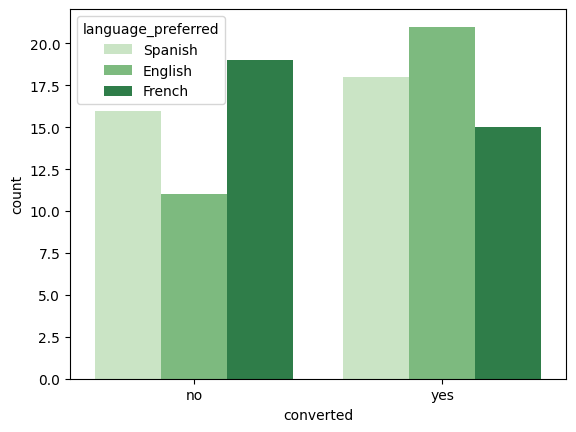

In [ ]:
sns.countplot(data=df, x='converted', hue='language_preferred', palette='Greens')
plt.show()

$H_0:$ Conversion to subscriber is independent of preferred language.  

$H_a:$ Converstion to subscriber is dependent of preferred language.

A Chi-Square Test for Independence will be conducted.

The significant level will be $a = .05 $

In [ ]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

In [ ]:
from scipy.stats import chi2_contingency

chi, p, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p)

The p-value is 0.21298887487543447


In [ ]:
if p < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Therefore, there is not enough statistical evidence to conclude that conversion to subscriber depends on the preferred language of the user.

## 4. Is the time spent on the new page same for the different language users?

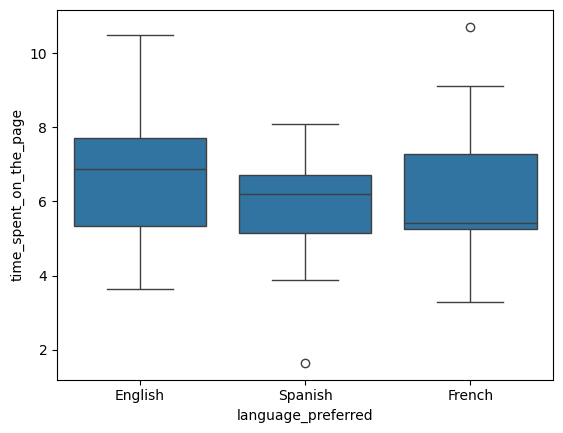

In [ ]:
new_page = df[df['landing_page'] == 'new']

sns.boxplot(data=new_page, x='language_preferred', y='time_spent_on_the_page')
plt.show()

In [ ]:
new_page.groupby('language_preferred')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


*   Let $\mu_1$ be the mean time spent on the new landing page with English being the preferred language.
*   Let $\mu_2$ be the mean time spent on the new landing page with Spanish being the preferred language.
*   Let $\mu_3$ be the mean time spent on the new landing page with French being the preferred language.

$H_0:\mu_1 = \mu_2 = \mu_3$

$H_a:$ At least one mean time spent on the new landing page is different for the different language preferences.

A One-way ANOVA test will be conducted.

The significant level will be $a = .05 $

In [ ]:
time_english = new_page[new_page['language_preferred'] == 'English']['time_spent_on_the_page']
time_spanish = new_page[new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page']
time_french = new_page[new_page['language_preferred'] == 'French']['time_spent_on_the_page']

In [ ]:
from scipy.stats import f_oneway

test_stat, p = stats.f_oneway(time_english, time_spanish, time_french)
print('The p-value is', p)

The p-value is 0.43204138694325955


In [ ]:
if p < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


As the p-value is greater than the significance level 0.05, we can not reject the null hypothesis. Therefore, there is not enough statistical evidence to conclude that there is a difference in time spent on the new landing page for the different language preferences.

## Conclusion and Business Recommendations

*   The new landing page gets more subscribers in comparison to the old landing page.
*   Users spend more time on the new landing page in comparison to the old landing page.
*   Conversion to new subscriber and the amount of time spent on the new page is not related to the preferred language of the user.

*   Switch to the new page, as it is increasing the amount of time users spend on the page and is increasing the amount of subscribers being converted.
*   Continue to provide various languages, as it will increase the amount of users while having no effect of conversion to subscriber or the amount of time spent on the page.



___